# Circuit-level depolarizing noise: BP-OSD vs MWPM

In [1]:
from bp_osd import BP_OSD
from pymatching import Matching

import stim
import numpy as np

In [2]:
NUM_ROUNDS = 5 # 1 round is for logical initialization
NOISE_PROB = 0.01
DISTANCE = 3

circuit = stim.Circuit.generated(code_task="surface_code:rotated_memory_z", 
                                 distance=DISTANCE, 
                                 rounds=NUM_ROUNDS, 
                                 after_clifford_depolarization=NOISE_PROB)

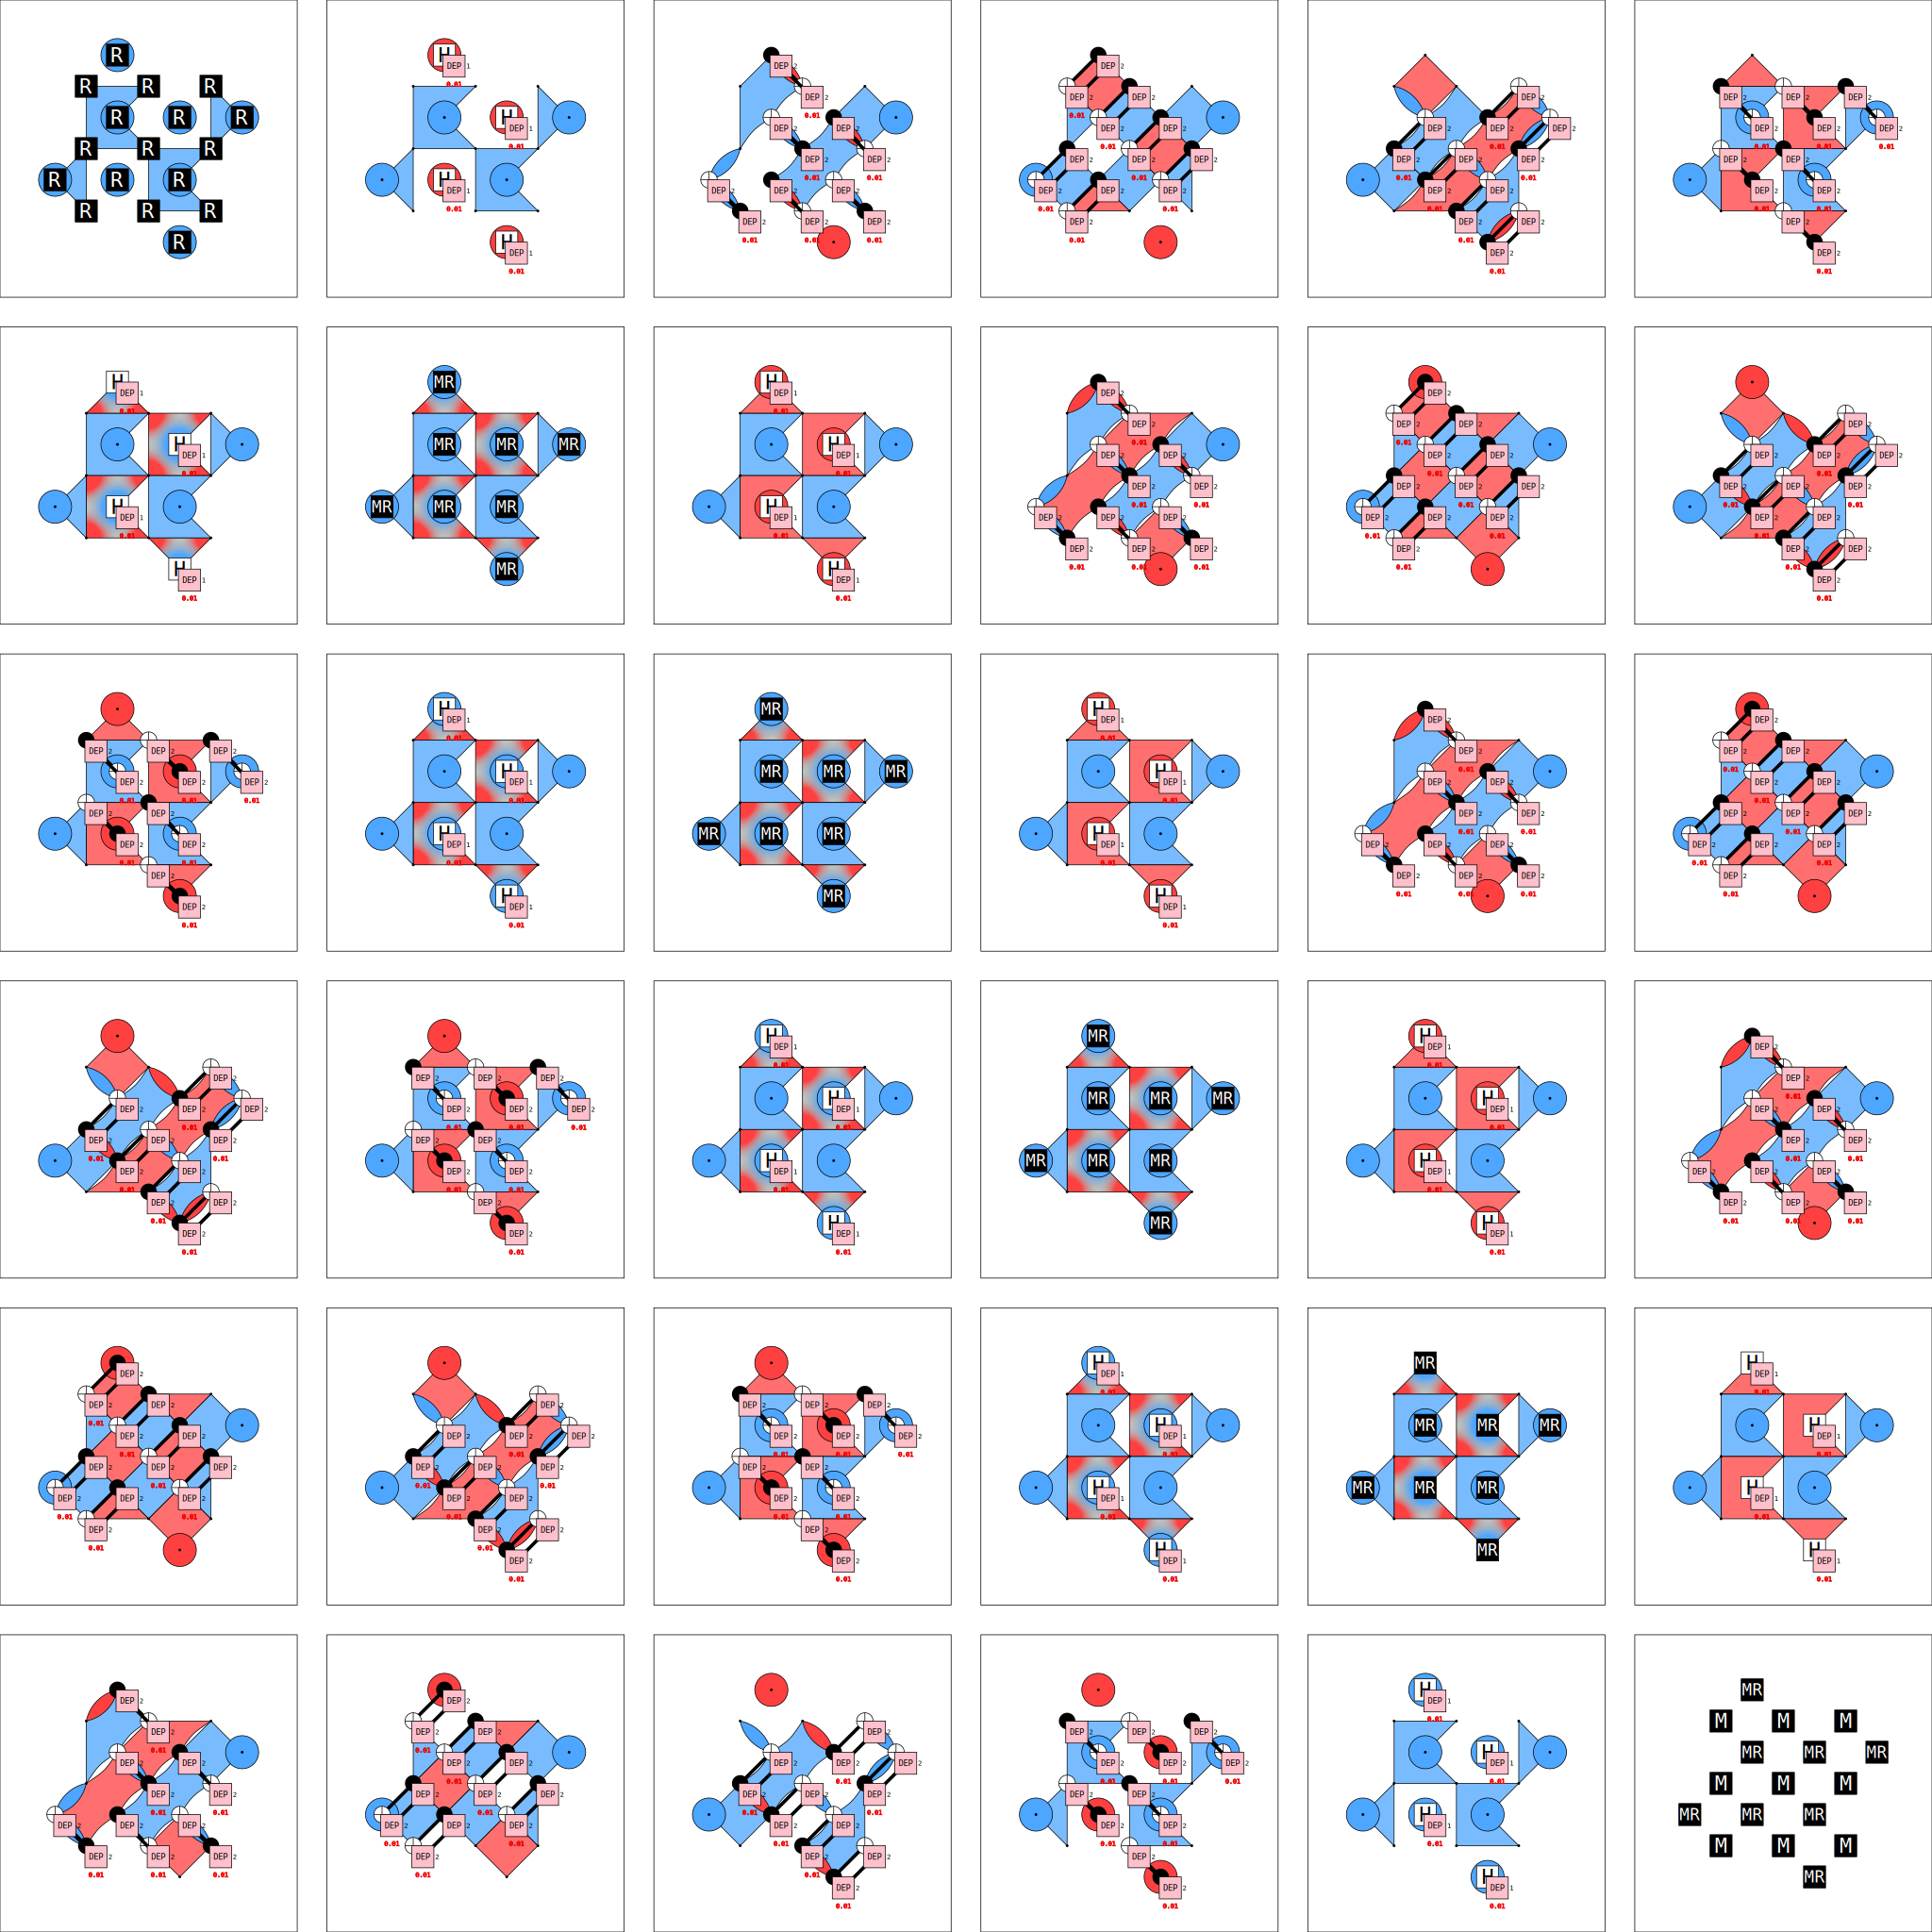

In [3]:
circuit.diagram(type="detslice-with-ops")

In [4]:
circuit.detector_error_model()

stim.DetectorErrorModel('''
    error(0.00267382) D0
    error(0.00267382) D0 D1
    error(0.00533333) D0 D8
    error(0.00267382) D1 D2
    error(0.00400536) D1 D4 D5
    error(0.0013387) D1 D4 D8
    error(0.00797863) D1 D4 L0
    error(0.00665775) D1 D5
    error(0.00400536) D1 D8
    error(0.00797863) D1 L0
    error(0.00731863) D2
    error(0.00533333) D2 D3
    error(0.00533333) D2 D3 D6
    error(0.00599599) D2 D5
    error(0.00200671) D2 D5 D6
    error(0.00200671) D2 D5 D6 D9
    error(0.000669799) D2 D5 D9
    error(0.000669799) D2 D6
    error(0.000669799) D2 D6 D8
    error(0.000669799) D2 D6 D8 D9
    error(0.000669799) D2 D6 D9
    error(0.00200671) D2 D6 D9 D10
    error(0.00200671) D2 D6 D10
    error(0.00200671) D2 D8
    error(0.00200671) D2 D8 D9
    error(0.00466979) D2 D9
    error(0.000669799) D2 D9 D10
    error(0.00599599) D2 D10
    error(0.00267382) D3 D5
    error(0.00267382) D3 D5 D6
    error(0.00267382) D3 D6 D7
    error(0.00267382) D3 D6 D10
    error(0.

In [5]:
sampler = circuit.compile_detector_sampler()
defects, log_flips = sampler.sample(shots=1_000_000, separate_observables=True)

In [6]:
bp_osd = BP_OSD.from_detector_error_model(circuit.detector_error_model())
bp_osd._matrices.check_matrix

<40x443 sparse matrix of type '<class 'numpy.uint8'>'
	with 1188 stored elements in Compressed Sparse Column format>

In [9]:
mwpm = Matching(circuit.detector_error_model(decompose_errors=True))
predictions_mwpm = mwpm.decode_batch(defects)
print("prob logical error MWPM  ", 
      np.average(predictions_mwpm != log_flips), 
      np.std(predictions_mwpm != log_flips)/np.sqrt(log_flips.shape[0]))

bp_osd = BP_OSD.from_detector_error_model(circuit.detector_error_model(), bp_method="product_sum")
predictions_bposd = bp_osd.decode_batch(defects)
print("prob logical error BP-OSD", 
      np.average(predictions_bposd != log_flips), 
      np.std(predictions_bposd != log_flips)/np.sqrt(log_flips.shape[0]))

for osd_order in [40]:
    bp_osd_cs = BP_OSD.from_detector_error_model(circuit.detector_error_model(), bp_method="product_sum", osd_method="osd_cs", osd_order=osd_order)
    predictions_bposd_cs = bp_osd_cs.decode_batch(defects)
    print(f"prob logical error BP-OSD(order={osd_order})", 
          np.average(predictions_bposd_cs != log_flips), 
          np.std(predictions_bposd_cs != log_flips)/np.sqrt(log_flips.shape[0]))

prob logical error MWPM   0.034513 0.00018254274247693337


100%|███████████████████████████████| 1000000/1000000 [02:13<00:00, 7488.85it/s]


prob logical error BP-OSD 0.042031 0.00020065989893100212


100%|███████████████████████████████| 1000000/1000000 [06:31<00:00, 2552.46it/s]

prob logical error BP-OSD(order=40) 0.028459 0.00016628014108425576


In [10]:
mwpm = Matching(circuit.detector_error_model(decompose_errors=True))
predictions_mwpm = mwpm.decode_batch(defects)
print("prob logical error MWPM  ", 
      np.average(predictions_mwpm != log_flips), 
      np.std(predictions_mwpm != log_flips)/np.sqrt(log_flips.shape[0]))

bp_osd = BP_OSD.from_detector_error_model(circuit.detector_error_model(), bp_method="product_sum_log")
predictions_bposd = bp_osd.decode_batch(defects)
print("prob logical error BP-OSD", 
      np.average(predictions_bposd != log_flips), 
      np.std(predictions_bposd != log_flips)/np.sqrt(log_flips.shape[0]))

for osd_order in [40]:
    bp_osd_cs = BP_OSD.from_detector_error_model(circuit.detector_error_model(), bp_method="product_sum_log", osd_method="osd_cs", osd_order=osd_order)
    predictions_bposd_cs = bp_osd_cs.decode_batch(defects)
    print(f"prob logical error BP-OSD(order={osd_order})", 
          np.average(predictions_bposd_cs != log_flips), 
          np.std(predictions_bposd_cs != log_flips)/np.sqrt(log_flips.shape[0]))

prob logical error MWPM   0.034513 0.00018254274247693337


100%|███████████████████████████████| 1000000/1000000 [07:14<00:00, 2301.89it/s]


prob logical error BP-OSD 0.042031 0.00020065989893100212


100%|███████████████████████████████| 1000000/1000000 [11:21<00:00, 1467.86it/s]

prob logical error BP-OSD(order=40) 0.028459 0.00016628014108425576


In [11]:
mwpm = Matching(circuit.detector_error_model(decompose_errors=True))
predictions_mwpm = mwpm.decode_batch(defects)
print("prob logical error MWPM  ", 
      np.average(predictions_mwpm != log_flips), 
      np.std(predictions_mwpm != log_flips)/np.sqrt(log_flips.shape[0]))

bp_osd = BP_OSD.from_detector_error_model(circuit.detector_error_model(), bp_method="minimum_sum")
predictions_bposd = bp_osd.decode_batch(defects)
print("prob logical error BP-OSD", 
      np.average(predictions_bposd != log_flips), 
      np.std(predictions_bposd != log_flips)/np.sqrt(log_flips.shape[0]))

for osd_order in [40]:
    bp_osd_cs = BP_OSD.from_detector_error_model(circuit.detector_error_model(), bp_method="minimum_sum", osd_method="osd_cs", osd_order=osd_order)
    predictions_bposd_cs = bp_osd_cs.decode_batch(defects)
    print(f"prob logical error BP-OSD(order={osd_order})", 
          np.average(predictions_bposd_cs != log_flips), 
          np.std(predictions_bposd_cs != log_flips)/np.sqrt(log_flips.shape[0]))

prob logical error MWPM   0.034513 0.00018254274247693337


100%|███████████████████████████████| 1000000/1000000 [02:11<00:00, 7586.56it/s]


prob logical error BP-OSD 0.05641 0.00023071175067603295


100%|███████████████████████████████| 1000000/1000000 [06:28<00:00, 2570.69it/s]

prob logical error BP-OSD(order=40) 0.032422 0.00017711807902074826


In [12]:
mwpm = Matching(circuit.detector_error_model(decompose_errors=True))
predictions_mwpm = mwpm.decode_batch(defects)
print("prob logical error MWPM  ", 
      np.average(predictions_mwpm != log_flips), 
      np.std(predictions_mwpm != log_flips)/np.sqrt(log_flips.shape[0]))

bp_osd = BP_OSD.from_detector_error_model(circuit.detector_error_model(), bp_method="minimum_sum_log")
predictions_bposd = bp_osd.decode_batch(defects)
print("prob logical error BP-OSD", 
      np.average(predictions_bposd != log_flips), 
      np.std(predictions_bposd != log_flips)/np.sqrt(log_flips.shape[0]))

for osd_order in [40]:
    bp_osd_cs = BP_OSD.from_detector_error_model(circuit.detector_error_model(), bp_method="minimum_sum_log", osd_method="osd_cs", osd_order=osd_order)
    predictions_bposd_cs = bp_osd_cs.decode_batch(defects)
    print(f"prob logical error BP-OSD(order={osd_order})", 
          np.average(predictions_bposd_cs != log_flips), 
          np.std(predictions_bposd_cs != log_flips)/np.sqrt(log_flips.shape[0]))

prob logical error MWPM   0.034513 0.00018254274247693337


100%|███████████████████████████████| 1000000/1000000 [02:16<00:00, 7337.47it/s]


prob logical error BP-OSD 0.05641 0.00023071175067603295


100%|███████████████████████████████| 1000000/1000000 [06:36<00:00, 2521.42it/s]

prob logical error BP-OSD(order=40) 0.032422 0.00017711807902074826
